# Disaster Tweet Prediction using NLP
1st Step: Cleaning and Processing Data

2nd Step: Turning Cleaned and Processed Data into Numeric

3rd Step: Applying ML Model for Prediction

https://www.kaggle.com/c/nlp-getting-started

In [42]:
#reading the data
import pandas as pd

test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [43]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [44]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# 1st Step: Cleaning and Processing Data

In [69]:
import re

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

def cleaning_data(data):
    
#     a) removing punctuation using regular expression -- 
    cleaned_punctuation_removed_sentences = []
    for sentence in data['text']:
            res = re.sub(r'[^\w\s]', '', sentence)
            cleaned_punctuation_removed_sentences.append(res)
    data['text'] = cleaned_punctuation_removed_sentences

    
    # b) we will do tokenizing to convert sentences into tokens i.e. words -- 
#     One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph. 
    data['tokenized_text'] = ''
    data['tokenized_text_nltk_lambda'] = data['text'].apply(lambda x: word_tokenize(x))

    
    # c) remove stopwords Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, 
#     both when indexing entries for searching and when retrieving them as the result of a search query. 
    stop_words = set(stopwords.words('english'))
    word_tokens = data['tokenized_text_nltk_lambda']  
    cleaned_sentences = []
    for sentence in word_tokens:
        filtered_sentence = [word for word in sentence if not word.lower() in stop_words]
        cleaned_sentences.append(filtered_sentence)     

        
    # d) Lemmatization -- In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words. For example, runs, running, 
    # ran are all forms of the word run, therefore run is the lemma of all these words
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentences = []
    for sentence in cleaned_sentences:
        temp = [lemmatizer.lemmatize(word.lower()) for word in sentence]
        lemmatized_sentences.append(temp)
    data['cleaned_text'] = lemmatized_sentences

    # e) Converting array of array separate texts above into a single list with sentencesS
    data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join(x))   

    return data

In [70]:
clean_train_data = cleaning_data(train_data)

[nltk_data] Downloading package punkt to C:\Users\Salman
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Salman
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Salman
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2nd Step: Turning Cleaned and Processed Data into Numeric

In [71]:
#  a) Using TF-IDF vectorizer to convert data to numeric
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = clean_train_data['cleaned_text'].values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Visualizing the Document Term Matrix using TF-IDF
import pandas as pd
VectorizedText=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
VectorizedText['originalText']= pd.Series(corpus)

# 3rd Step: Applying ML Model for Prediction

i) Add labels column to above TF-IDF vectorizer for training model

In [72]:
VectorizedText['Target'] = train_data['target']

In [73]:
VectorizedText

,0011,001116,0025,005225,010156,010217,0104,010401,0106,0111,...,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûûif,originalText,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,deed reason earthquake may allah forgive u,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,forest fire near la ronge sask canada,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,resident asked shelter place notified officer ...,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13000 people receive wildfire evacuation order...,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,got sent photo ruby alaska smoke wildfire pour...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,two giant crane holding bridge collapse nearby...,1
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aria_ahrary thetawniest control wild fire cali...,1
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.428471,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,police investigating ebike collided car little...,1


In [74]:
cols = [col for col in VectorizedText.columns if col not in ['originalText', 'Target']]
x = VectorizedText[cols]
x

,0011,001116,0025,005225,010156,010217,0104,010401,0106,0111,...,ûïwhen,ûïymcglaun,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûûif
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.428471,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
y = VectorizedText['Target']

In [76]:
y.value_counts()

0    4342
1    3271
Name: Target, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

ii) Training and Validation set (Logistic Regression)

In [78]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y)

In [79]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
predictions = clf.predict(x_validation)

In [80]:
predictions

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1069
           1       0.86      0.64      0.74       835

    accuracy                           0.80      1904
   macro avg       0.81      0.78      0.79      1904
weighted avg       0.81      0.80      0.79      1904



In [63]:
score = clf.score(x_validation, y_validation)
print(score)

0.8082983193277311


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_validation, predictions)
print(cm)

[[1026   91]
 [ 274  513]]


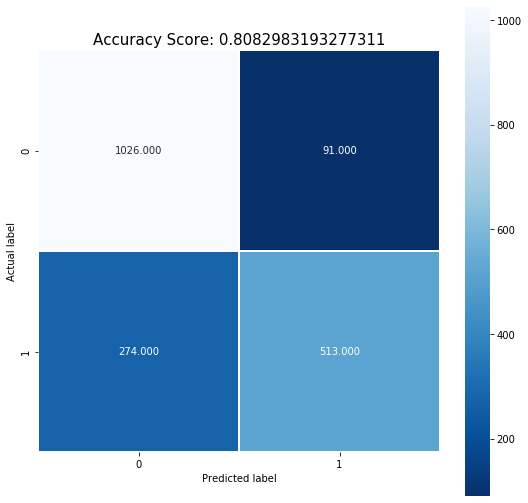

In [65]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

iii) Testing on cleaned test data

In [82]:
cleaned_test_data = cleaning_data(test_data)

[nltk_data] Downloading package punkt to C:\Users\Salman
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Salman
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Salman
[nltk_data]     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = cleaned_test_data['cleaned_text'].values

X = vectorizer.transform(corpus)

# Visualizing the Document Term Matrix using TF-IDF
import pandas as pd
VectorizedText=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#VectorizedText['originalText']= pd.Series(corpus)

In [105]:
predictions_testdata = clf.predict(VectorizedText)

In [106]:
predictions_testdata

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [119]:
final_submission = pd.DataFrame()

In [120]:
final_submission = cleaned_test_data['id']
final_submission

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [121]:
final_submission_2 = pd.DataFrame(predictions_testdata)
final_submission_2

,0
0,1
1,1
2,1
3,1
4,1
...,...
3258,1
3259,0
3260,1
3261,1


In [123]:
final_submission = pd.concat([final_submission, final_submission_2], axis=1).reindex(final_submission.index)

In [131]:
final_submission = final_submission.rename({'id': 'id', 0: 'target'}, axis=1)
final_submission = final_submission.reset_index(drop=True)
final_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [132]:
final_submission.to_csv('final_submission.csv', index = False)

### Achieved a score of 0.79681 on Kaggle submission of the above final_submission.csv on test data